In [2]:
import re
import glob
import codecs
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest

import pickle

np.random.seed(100)

In [3]:
import pickle
with open('enron_email.df', 'rb') as handle:
    data = pickle.load(handle)
data.head()
X = data['Text']
Y = data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

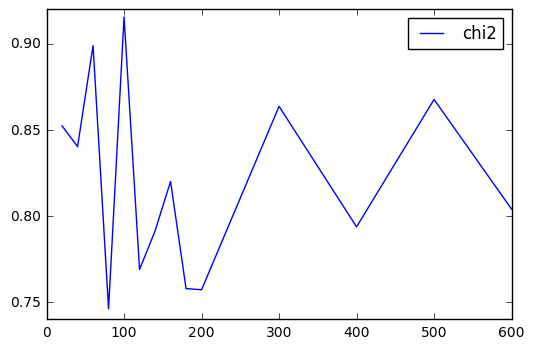

In [8]:
auc_chi2 = []
binary_vectorizer = CountVectorizer(binary=True,ngram_range=(1, 1),stop_words='english')
X_train_features_b = binary_vectorizer.fit_transform(X_train)
X_test_features_b = binary_vectorizer.fit_transform(X_test)

for k in [20,40,60,80,100,120,140,160,180,200,300,400,500,600]:
    ch2 = SelectKBest(chi2, k)
    X_binary_train_features_ch = ch2.fit_transform(X_train_features_b, Y_train)
    X_binary_test_features_ch = ch2.fit_transform(X_test_features_b, Y_test)
    model_chi2 = LogisticRegression()
    model_chi2.fit(X_binary_train_features_ch,Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model_chi2.predict_proba(X_binary_test_features_ch)[:,1])
    roc_label=auc(fpr,tpr)
    auc_chi2.append(roc_label)
    

plt.plot([20,40,60,80,100,120,140,160,180,200,300,400,500,600],auc_chi2)
plt.legend(['chi2', 'f_classif'], loc='upper right')

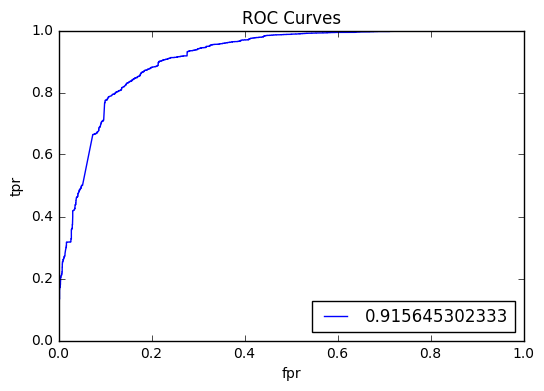

In [10]:
ch2 = SelectKBest(chi2, k=100)
X_binary_train_features_ch = ch2.fit_transform(X_train_features_b, Y_train)
X_binary_test_features_ch = ch2.fit_transform(X_test_features_b, Y_test)
model_chi2 = LogisticRegression()
model_chi2.fit(X_binary_train_features_ch,Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model_chi2.predict_proba(X_binary_test_features_ch)[:,1])
roc_label=auc(fpr,tpr)
plt.plot(fpr, tpr, label=roc_label)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc=4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
plt.close()

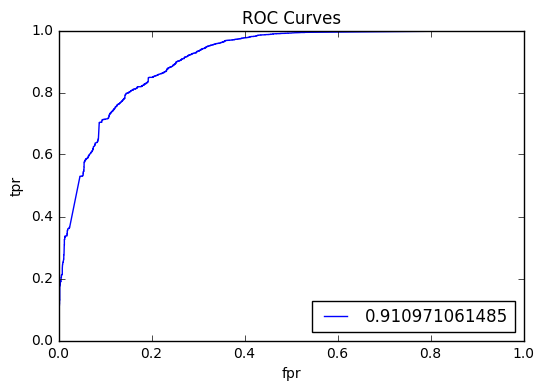

In [11]:
model = BernoulliNB()
model.fit(X_binary_train_features_ch,Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_binary_test_features_ch)[:,1])
roc_label=auc(fpr,tpr)
plt.plot(fpr, tpr, label=roc_label)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc=4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
plt.close()

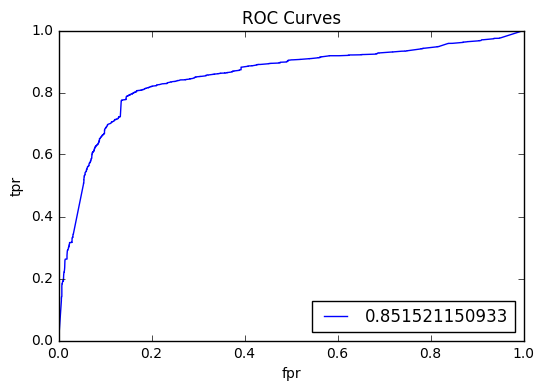

In [13]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_binary_train_features_ch,Y_train )
fpr, tpr, thresholds = metrics.roc_curve(Y_test, forest.predict_proba(X_binary_test_features_ch)[:,1])
roc_label=auc(fpr,tpr)
plt.plot(fpr, tpr, label=roc_label)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc=4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
plt.close()

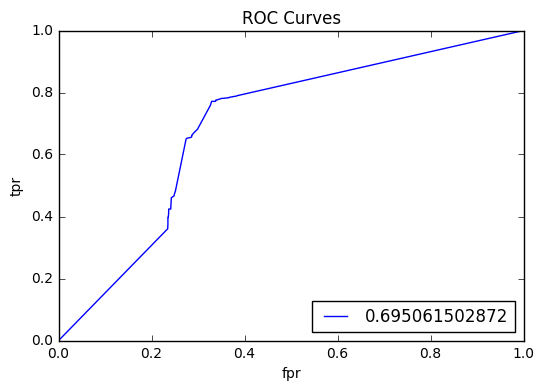

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit( X_binary_train_features_ch,Y_train )
fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf.predict_proba(X_binary_test_features_ch)[:,1])
roc_label=auc(fpr,tpr)
plt.plot(fpr, tpr, label=roc_label)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc=4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
plt.close()

In [15]:
tprs=[]
fprs=[]
roc_labels=[]
plt.rcParams['figure.figsize'] = 12, 12
model = LogisticRegression()
model.fit(X_binary_train_features_ch,Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_binary_test_features_ch)[:,1])
tprs.append(tpr)
fprs.append(fpr)
label_b_l=auc(fpr,tpr)
#label_b_l=metrics.roc_auc_score(model.predict(X_test_features_b), Y_test)
roc_labels.append(" Binary with Logistic. AUC--"+str(label_b_l))

model = BernoulliNB()
model.fit(X_binary_train_features_ch,Y_train)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_binary_test_features_ch)[:,1])
tprs.append(tpr)
fprs.append(fpr)
label_b_l=auc(fpr,tpr)
#label_b_l=metrics.roc_auc_score(model.predict(X_test_features_b), Y_test)
roc_labels.append(" Binary with Naive Bayes. AUC--"+str(label_b_l))

model = tree.DecisionTreeClassifier()
model = clf.fit( X_binary_train_features_ch,Y_train )
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_binary_test_features_ch)[:,1])
tprs.append(tpr)
fprs.append(fpr)
label_b_l=auc(fpr,tpr)
#label_b_l=metrics.roc_auc_score(model.predict(X_test_features_b), Y_test)
roc_labels.append(" Binary with decision tree. AUC--"+str(label_b_l))

model = RandomForestClassifier(n_estimators = 100) 
model = model.fit( X_binary_train_features_ch,Y_train )
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_binary_test_features_ch)[:,1])
tprs.append(tpr)
fprs.append(fpr)
label_b_l=auc(fpr,tpr)
#label_b_l=metrics.roc_auc_score(model.predict(X_test_features_b), Y_test)
roc_labels.append(" Binary with Randomforest. AUC--"+str(label_b_l))

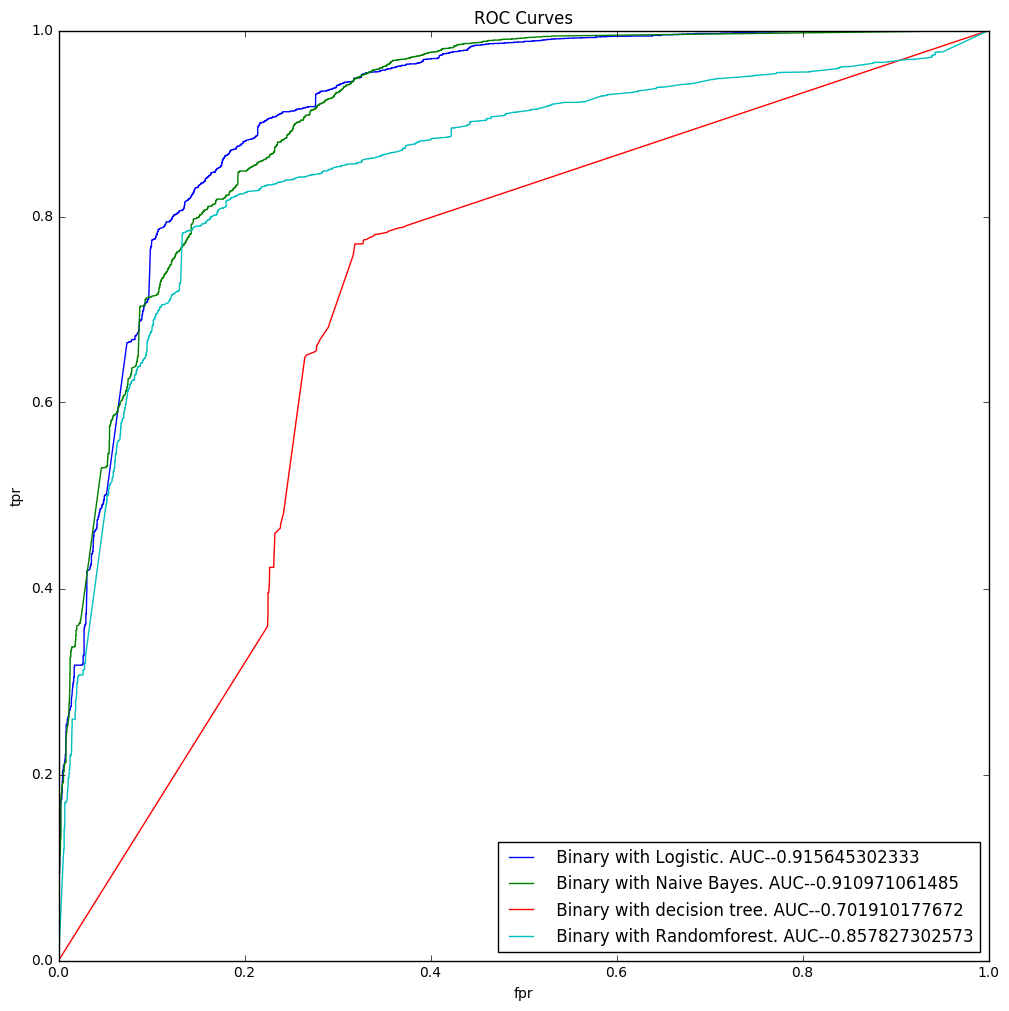

In [16]:
for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.legend(loc=4)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()